In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('G:\DS')

In [2]:
data=pd.read_csv('Loan_data_new.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002_1,Male,No,3+,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003_2,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005_3,Male,Yes,3+,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006_4,Male,Yes,3+,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,N
4,LP001008_5,Male,No,3+,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID                 0
Gender                 27
Married                 6
Dependents           1110
Education               0
Self_Employed          68
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             45
Loan_Amount_Term       29
Credit_History        102
Property_Area           0
Loan_Status             0
dtype: int64

In [14]:
print(data.count().head())
print(data.count().tail())

Loan_ID       1250
Gender        1223
Married       1244
Dependents     140
Education     1250
dtype: int64
LoanAmount          1205
Loan_Amount_Term    1221
Credit_History      1148
Property_Area       1250
Loan_Status         1250
dtype: int64


In [29]:
data_missing = data.isna()
data_missing.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
data_missing_sum = data_missing.sum()
data_missing_sum.head()

Loan_ID          0
Gender          27
Married          6
Dependents    1110
Education        0
dtype: int64

In [32]:
# %of missing data
data_missing_sum/len(data)*100

Loan_ID               0.00
Gender                2.16
Married               0.48
Dependents           88.80
Education             0.00
Self_Employed         5.44
ApplicantIncome       0.00
CoapplicantIncome     0.00
LoanAmount            3.60
Loan_Amount_Term      2.32
Credit_History        8.16
Property_Area         0.00
Loan_Status           0.00
dtype: float64

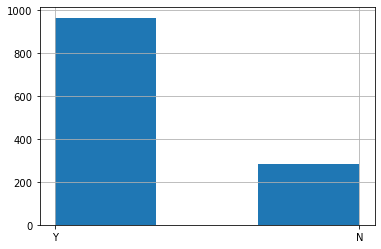

In [40]:
import matplotlib.pyplot as plt
data['Loan_Status'].hist(bins = 3)

In [45]:
print(data['Gender'].value_counts())
print(data['Married'].value_counts())
print(data['Credit_History'].value_counts())


Male      999
Female    224
Name: Gender, dtype: int64
Yes    812
No     432
Name: Married, dtype: int64
1.0    966
0.0    182
Name: Credit_History, dtype: int64


In [46]:
data['Gender'].fillna(value=data['Gender'].mode().iloc[0],inplace=True)
data['Married'].fillna(value=data['Married'].mode().iloc[0],inplace=True)
data['Self_Employed'].fillna(value=data['Self_Employed'].mode().iloc[0],inplace=True)
data['LoanAmount'].fillna(value=data['LoanAmount'].mode().iloc[0],inplace=True)
data['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].mode().iloc[0],inplace=True)
data['Credit_History'].fillna(value=data['Credit_History'].mode().iloc[0],inplace=True)
data.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents           1110
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
dtype: int64

In [47]:
data=data.drop('Dependents',axis=1)

In [48]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002_1,Male,No,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003_2,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005_3,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006_4,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,N
4,LP001008_5,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
data['Gender_M']=np.where(data['Gender']=='Male',1,0)
data['Married_Y']=np.where(data['Married']=='Yes',1,0)
data['Self_Employed_Y']=np.where(data['Self_Employed']=='Yes',1,0)
data['Property_Area_R']=np.where(data['Property_Area']=='Rural',1,0)
data['Property_Area_U']=np.where(data['Property_Area']=='Urban',1,0)
data['Education_G']=np.where(data['Education']=='Graduate',1,0)
data['Loan_Status']=np.where(data['Loan_Status']=='Y',1,0)

In [54]:
print('Percentage of Male in Gender : ', data['Gender_M'].mean()*100)
print('Percentage of Married in Married :',data['Married_Y'].mean()*100)
print('Percentage of Self Employed',data['Self_Employed_Y'].mean()*100)
print('Percentage of Rural in property area',data['Property_Area_R'].mean()*100)
print('Percentage of Urban in property area', data['Property_Area_U'].mean()*100)
print('Percentage of Graduates in Education',data['Education_G'].mean()*100)
print('Percentage of Loan Approved',data['Loan_Status'].mean()*100)

Percentage of Male in Gender :  82.08
Percentage of Married in Married : 65.44
Percentage of Self Employed 13.28
Percentage of Rural in property area 28.64
Percentage of Urban in property area 33.68
Percentage of Graduates in Education 77.92
Percentage of Loan Approved 77.2


In [56]:
data['Loan_Status'].value_counts()

1    965
0    285
Name: Loan_Status, dtype: int64

In [57]:
data.tail()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_M,Married_Y,Self_Employed_Y,Property_Area_R,Property_Area_U,Education_G
1245,LP001066_1246,Male,Yes,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,1,1,1,1,0,0,1
1246,LP001068_1247,Male,Yes,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,1,1,1,0,0,0,1
1247,LP001073_1248,Male,Yes,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,1,1,1,0,0,1,0
1248,LP001086_1249,Male,No,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,0,1,0,0,0,1,0
1249,LP001087_1250,Female,No,Graduate,No,3750,2083.0,120.0,360.0,1.0,Semiurban,1,0,0,0,0,0,1


In [58]:
data=data.drop(['Gender','Married','Self_Employed','Property_Area','Education'],axis=1)

In [60]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_M,Married_Y,Self_Employed_Y,Property_Area_R,Property_Area_U,Education_G
0,LP001002_1,5849,0.0,120.0,360.0,1.0,1,1,0,0,0,1,1
1,LP001003_2,4583,1508.0,128.0,360.0,1.0,1,1,1,0,1,0,1
2,LP001005_3,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,1,1
3,LP001006_4,2583,2358.0,120.0,360.0,1.0,0,1,1,0,0,1,0
4,LP001008_5,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,1,1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [79]:
X=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_M','Married_Y','Self_Employed_Y','Property_Area_R','Property_Area_U','Education_G']]
y=data['Loan_Status']

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 11)
(1000,)
(250, 11)
(250,)


In [82]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\dubas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
print(logreg.intercept_)
print(logreg.coef_)

[-0.56111252]
[[ 3.65703434e-04  4.21961736e-06 -2.87617960e-03 -7.80168141e-03
   1.65598361e+00  6.42290509e-01  2.77242020e-01  1.46055443e+00
  -3.89570936e-01 -5.21472388e-01  2.28982234e+00]]


In [84]:
coeff=pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(logreg.coef_.T)],axis=1)
coeff.columns=("var", "co-eff")
coeff

,var,co-eff
0,ApplicantIncome,0.000366
1,CoapplicantIncome,0.000004
2,LoanAmount,-0.002876
3,Loan_Amount_Term,-0.007802
4,Credit_History,1.655984
5,Gender_M,0.642291
6,Married_Y,0.277242
7,Self_Employed_Y,1.460554
8,Property_Area_R,-0.389571
9,Property_Area_U,-0.521472


In [85]:
coeff['odds(co-eff)']=np.exp(coeff['co-eff'])
coeff

,var,co-eff,odds(co-eff)
0,ApplicantIncome,0.000366,1.000366
1,CoapplicantIncome,0.000004,1.000004
2,LoanAmount,-0.002876,0.997128
3,Loan_Amount_Term,-0.007802,0.992229
4,Credit_History,1.655984,5.238230
5,Gender_M,0.642291,1.900830
6,Married_Y,0.277242,1.319486
7,Self_Employed_Y,1.460554,4.308348
8,Property_Area_R,-0.389571,0.677347
9,Property_Area_U,-0.521472,0.593646


In [86]:
train_pred=pd.DataFrame(logreg.predict(X_test))
train_pred.columns=['pred_results']
train_pred.head()

,pred_results
0,1
1,1
2,1
3,1
4,1


In [88]:
y_train=y_train.reset_index(drop=True)

In [89]:
pd.concat([train_pred,y_train],axis=1)

,pred_results,Loan_Status
0,1.0,1
1,1.0,0
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
995,NaN,1
996,NaN,1
997,NaN,1
998,NaN,1


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,train_pred)

array([[ 19,  31],
       [  9, 191]], dtype=int64)

In [94]:
pred = logreg.predict(X_test)
print(pred)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [101]:
# import seaborn as sns
# sns.distplot(y_test-pred)

In [102]:
# import pickle
# file = open('Loan Approval Prediction.pkl', 'wb')
# pickle.dump(logreg, file)